# Keras - LSTM

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_ytrevikna_simple.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 16 columns):
YVIK-YtreVikna1-Sum-produksjon       5222 non-null float64
DNMI_75410...........T0015A3-0120    5237 non-null float64
/arome_windvel_6481_1056             5190 non-null float64
DNMI_75220...........T0015A3-0120    5237 non-null float64
/arome_windvel_6482_1114             5190 non-null float64
DNMI_75550...........T0015A3-0120    5237 non-null float64
/arome_windvel_6520_1098             5190 non-null float64
STORM-YVik1-Vindhast-25km            5237 non-null float64
STORM-YVik1-Vindretn-25km            5237 non-null int64
/arome_windvel_6495_1081             5190 non-null float64
/arome_windvel_6495_1096             5190 non-null float64
/arome_airtemp_6491_1087             5190 non-null float64
/arome_windvel_6491_1087             5190 non-null float64
/arome_windvel_6486_1082             5190 non-null float64
/arome_windvel_6486_1093             5190 non-null float64
Target    

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5236
Data columns (total 16 columns):
YVIK-YtreVikna1-Sum-produksjon       5165 non-null float64
DNMI_75410...........T0015A3-0120    5165 non-null float64
/arome_windvel_6481_1056             5165 non-null float64
DNMI_75220...........T0015A3-0120    5165 non-null float64
/arome_windvel_6482_1114             5165 non-null float64
DNMI_75550...........T0015A3-0120    5165 non-null float64
/arome_windvel_6520_1098             5165 non-null float64
STORM-YVik1-Vindhast-25km            5165 non-null float64
STORM-YVik1-Vindretn-25km            5165 non-null int64
/arome_windvel_6495_1081             5165 non-null float64
/arome_windvel_6495_1096             5165 non-null float64
/arome_airtemp_6491_1087             5165 non-null float64
/arome_windvel_6491_1087             5165 non-null float64
/arome_windvel_6486_1082             5165 non-null float64
/arome_windvel_6486_1093             5165 non-null float64
Target    

In [4]:
num_features = len(data.columns) -1
print(num_features)

15


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67, shuffle=False)

### Konvertere til tidserie matrise

In [8]:
# Definere variabler:
n_backward = 3

In [9]:
# Function for making time series
def make_time_series(row_features, look_back_num):
    list_of_matrices = []
    
    num_time_steps = look_back_num + 1
    
    i = num_time_steps
    
    while i < len(row_features):
        list_of_matrices.append(row_features[(i-num_time_steps):i,:])
        
        i = i + 1
    
    return list_of_matrices

In [10]:
x_train_matrix = np.asarray(make_time_series(X_train, n_backward))
x_test_matrix = np.asarray(make_time_series(X_test, n_backward))

In [11]:
x_train_matrix.shape

(3611, 4, 15)

In [12]:
x_train_matrix[0].shape

(4, 15)

#### Fjerne 'n_backward' antall rader, for å få like store sett

In [13]:
y_train_matrix = np.delete(y_train, [x for x in range(n_backward+1)], 0)
y_test_matrix = np.delete(y_test, [x for x in range(n_backward+1)], 0)

In [14]:
y_train_matrix.shape

(3611,)

# Keras

In [15]:
import tensorflow as tf

#### Importere modellen

In [16]:
from tensorflow.contrib.keras import models

In [17]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [18]:
from tensorflow.contrib.keras import layers

In [19]:
# Input layer
dnn_keras_model.add(layers.LSTM(units=60, input_shape=(x_train_matrix.shape[1],x_train_matrix.shape[2]) ))
# return_sequences = True

In [20]:
'''Hidden Layers'''
#dnn_keras_model.add(layers.LSTM(units=64, return_sequences = True))

#dnn_keras_model.add(layers.LSTM(units=32, return_sequences = True))

#dnn_keras_model.add(layers.LSTM(units=16))

'Hidden Layers'

In [21]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [22]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [23]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [24]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [25]:
from tensorflow.contrib.keras import callbacks

In [26]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=100)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_LSTM_simple.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [27]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(x_train_matrix,y_train_matrix, epochs = 1000, batch_size=100, verbose=2, 
                       validation_data=(x_test_matrix, y_test_matrix),
                       callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3611 samples, validate on 1546 samples
Epoch 1/1000
Epoch 00000: val_loss improved from inf to 15.06747, saving model to checkpoint_model_LSTM_simple.h5
1s - loss: 13.0850 - val_loss: 15.0675
Epoch 2/1000
Epoch 00001: val_loss improved from 15.06747 to 10.73649, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 9.0101 - val_loss: 10.7365
Epoch 3/1000
Epoch 00002: val_loss improved from 10.73649 to 9.65238, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 7.6605 - val_loss: 9.6524
Epoch 4/1000
Epoch 00003: val_loss improved from 9.65238 to 8.68664, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 6.8160 - val_loss: 8.6866
Epoch 5/1000
Epoch 00004: val_loss improved from 8.68664 to 7.90106, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 6.2092 - val_loss: 7.9011
Epoch 6/1000
Epoch 00005: val_loss improved from 7.90106 to 7.17684, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 5.7311 - val_loss: 7.1768
Epoch 7/1000
Epoch 00006:

Epoch 00070: val_loss did not improve
0s - loss: 3.0287 - val_loss: 3.6477
Epoch 72/1000
Epoch 00071: val_loss did not improve
0s - loss: 2.9975 - val_loss: 3.6622
Epoch 73/1000
Epoch 00072: val_loss did not improve
0s - loss: 3.0026 - val_loss: 3.7442
Epoch 74/1000
Epoch 00073: val_loss improved from 3.64309 to 3.61539, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 3.0241 - val_loss: 3.6154
Epoch 75/1000
Epoch 00074: val_loss did not improve
0s - loss: 2.9986 - val_loss: 3.7553
Epoch 76/1000
Epoch 00075: val_loss did not improve
0s - loss: 2.9751 - val_loss: 3.7144
Epoch 77/1000
Epoch 00076: val_loss did not improve
0s - loss: 2.9669 - val_loss: 3.7216
Epoch 78/1000
Epoch 00077: val_loss did not improve
0s - loss: 2.9598 - val_loss: 3.6412
Epoch 79/1000
Epoch 00078: val_loss did not improve
0s - loss: 2.9585 - val_loss: 3.7112
Epoch 80/1000
Epoch 00079: val_loss did not improve
0s - loss: 2.9993 - val_loss: 3.7336
Epoch 81/1000
Epoch 00080: val_loss did not improve
0s - l

Epoch 00157: val_loss did not improve
0s - loss: 2.7536 - val_loss: 4.1232
Epoch 159/1000
Epoch 00158: val_loss did not improve
0s - loss: 2.7729 - val_loss: 3.5103
Epoch 160/1000
Epoch 00159: val_loss did not improve
0s - loss: 2.8007 - val_loss: 3.5234
Epoch 161/1000
Epoch 00160: val_loss did not improve
0s - loss: 2.7386 - val_loss: 3.4958
Epoch 162/1000
Epoch 00161: val_loss did not improve
0s - loss: 2.7726 - val_loss: 3.7084
Epoch 163/1000
Epoch 00162: val_loss improved from 3.48780 to 3.47674, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 2.7301 - val_loss: 3.4767
Epoch 164/1000
Epoch 00163: val_loss did not improve
0s - loss: 2.7214 - val_loss: 3.5087
Epoch 165/1000
Epoch 00164: val_loss did not improve
0s - loss: 2.7828 - val_loss: 3.5528
Epoch 166/1000
Epoch 00165: val_loss improved from 3.47674 to 3.46750, saving model to checkpoint_model_LSTM_simple.h5
0s - loss: 2.7266 - val_loss: 3.4675
Epoch 167/1000
Epoch 00166: val_loss did not improve
0s - loss: 2.7476 - 

Epoch 00247: val_loss did not improve
0s - loss: 2.5469 - val_loss: 3.8203
Epoch 249/1000
Epoch 00248: val_loss did not improve
0s - loss: 2.5508 - val_loss: 3.7446
Epoch 250/1000
Epoch 00249: val_loss did not improve
0s - loss: 2.5591 - val_loss: 4.0935
Epoch 251/1000
Epoch 00250: val_loss did not improve
0s - loss: 2.5461 - val_loss: 3.8270
Epoch 252/1000
Epoch 00251: val_loss did not improve
0s - loss: 2.5494 - val_loss: 3.6880
Epoch 253/1000
Epoch 00252: val_loss did not improve
0s - loss: 2.5492 - val_loss: 3.8131
Epoch 254/1000
Epoch 00253: val_loss did not improve
0s - loss: 2.5959 - val_loss: 3.9254
Epoch 255/1000
Epoch 00254: val_loss did not improve
0s - loss: 2.5475 - val_loss: 3.7045
Epoch 256/1000
Epoch 00255: val_loss did not improve
0s - loss: 2.5443 - val_loss: 3.9793
Epoch 257/1000
Epoch 00256: val_loss did not improve
0s - loss: 2.5522 - val_loss: 4.1063
Epoch 258/1000
Epoch 00257: val_loss did not improve
0s - loss: 2.5409 - val_loss: 3.8427
Epoch 259/1000
Epoch 0025

# Resultater

In [28]:
from sklearn import metrics

In [29]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_LSTM_simple.h5')

#### Prediksjon på testsett

In [30]:
final_preds = finished_model.predict(x_test_matrix)

In [31]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test_matrix, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test_matrix, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test_matrix, final_preds)))

Mean Absolute Error: 			 3.4675
Mean Squared Error: 			 24.6625
Root Mean Squared Error: 		 4.96614


#### Prediksjon på treningdata

In [32]:
train_preds = finished_model.predict(x_train_matrix)

In [33]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train_matrix,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train_matrix, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train_matrix, train_preds)))

Mean Absolute Error: 			 2.70453
Mean Squared Error: 			 16.8516
Root Mean Squared Error: 		 4.10508


# Visualisere resultater

#### Lager oversikt over testdataen

In [34]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [35]:
Oversikt = pd.DataFrame(data = {'real': y_test_matrix, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

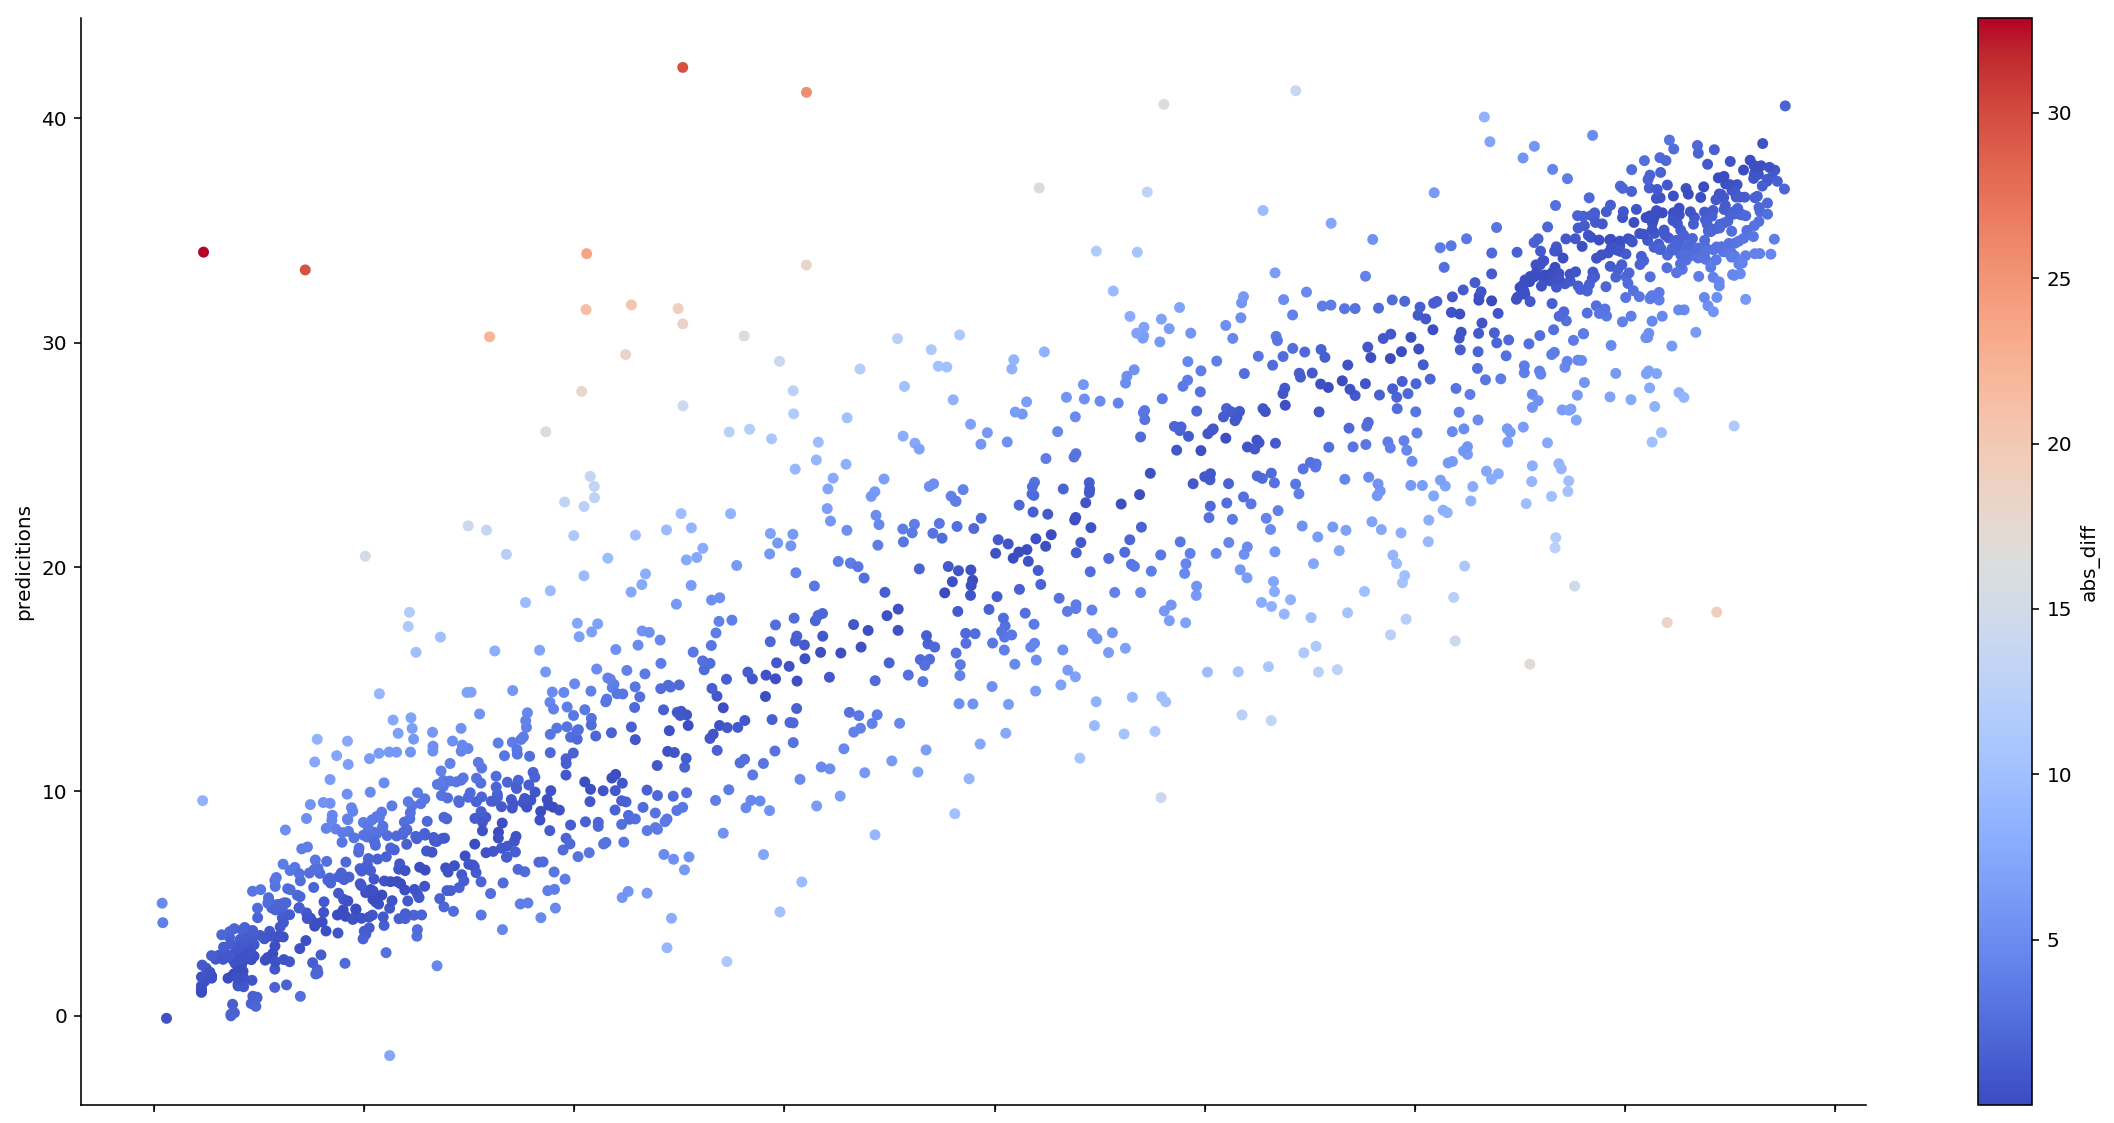

In [36]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

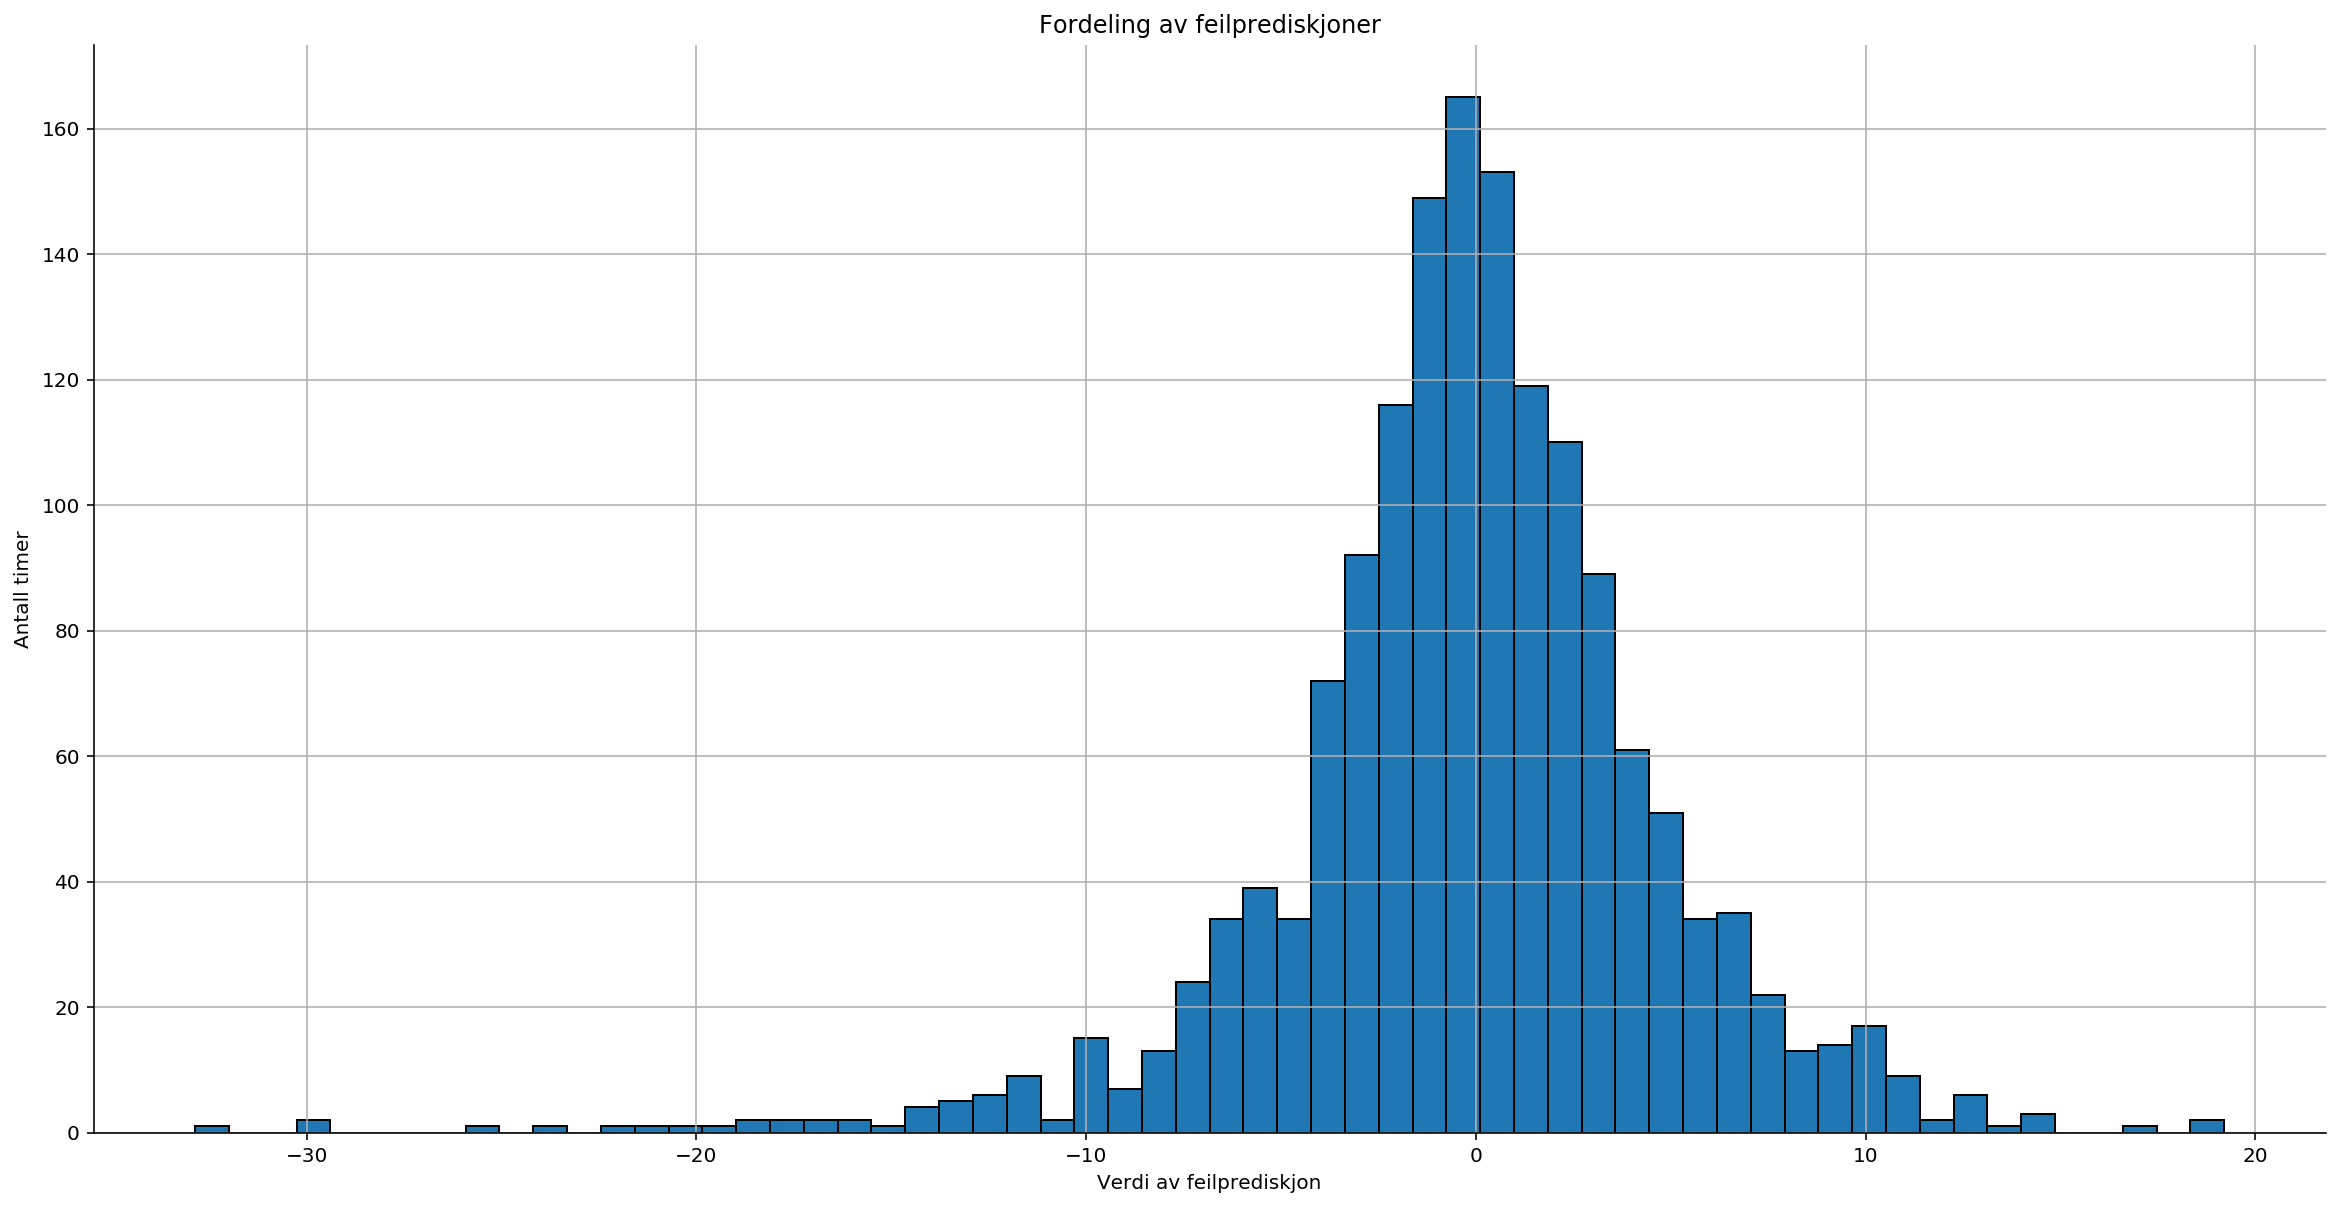

In [37]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [38]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

ValueError: Error when checking : expected lstm_1_input to have 3 dimensions, but got array with shape (5165, 15)

#### Tidsplot av data

In [ ]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')